<a href="https://colab.research.google.com/github/nobertomaciel/AI-UNIFACS/blob/main/CNN/cnn_mnist_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import tkinter as tk
from tkinter import filedialog

In [8]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)



print('x_train_shape:',x_train.shape)
print('no of images in x train',x_train.shape[0])
print('no of images in x test',x_test.shape[0])





model = keras.Sequential(
    [
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=128, epochs=1, validation_split=0.1)


test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

predictions = model.predict(x_test)

x_train_shape: (60000, 28, 28, 1)
no of images in x train 60000
no of images in x test 10000


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7719 - loss: 0.7510 - val_accuracy: 0.9755 - val_loss: 0.0873
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9693 - loss: 0.1098
Test accuracy: 0.973800003528595
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


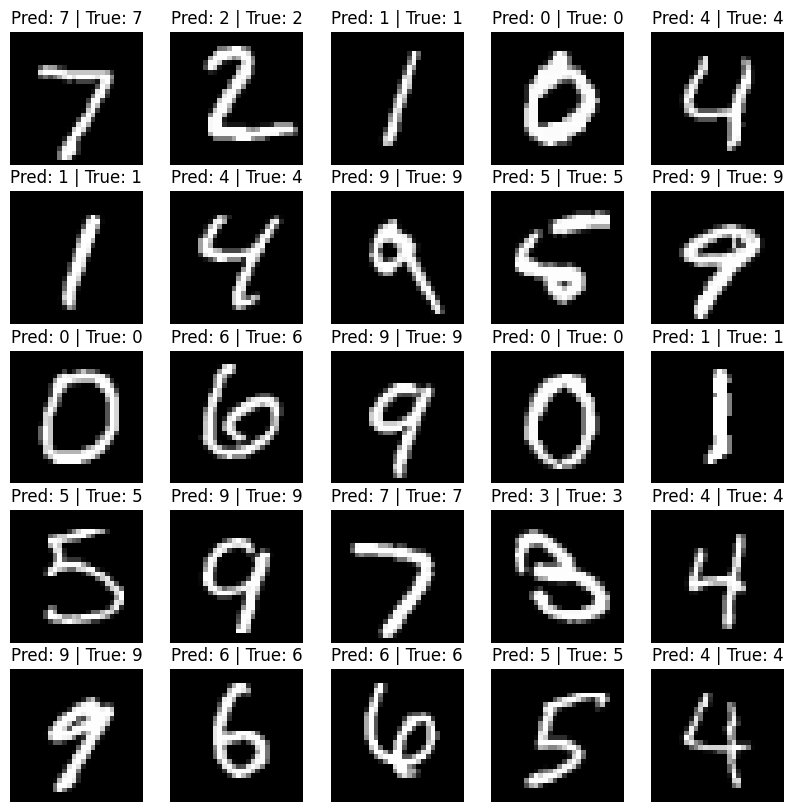

In [9]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i, :, :, 0], cmap="gray")
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    plt.title("Pred: {} | True: {}".format(predicted_label, true_label))
    plt.axis("off")
plt.show()

In [7]:
# teste com imagem real
root = tk.Tk()
root.withdraw()  # Esconde a janela principal

image_path = filedialog.askopenfilename(
    title="Selecione uma imagem",
    filetypes=[("Imagens", "*.jpg *.jpeg *.png *.bmp *.gif")]
)

if not image_path:
    print("Nenhuma imagem selecionada.")
else:
    image = Image.open(image_path).convert("L").resize((28, 28))
    image.show()
    image_arr = np.array(image).astype("float32") / 255.0
    image_arr = np.expand_dims(image_arr, 0)
    image_arr = np.expand_dims(image_arr, -1)

    prediction = model.predict(image_arr)
    predicted_label = np.argmax(prediction)
    model.evaluate(x_test,y_test)
    print("Predicted label:", predicted_label)

Saving Captura de tela de 2025-05-11 23-08-32.png to Captura de tela de 2025-05-11 23-08-32 (1).png


AttributeError: 'dict' object has no attribute 'resize'